In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from plotnine import *
%matplotlib inline

In [2]:
# Read in College Data CSV
college_data = pd.read_csv('college-records.csv')

In [3]:
college_data.head(10)

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type of College,...,2018,2019,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept,Ownership,County,State
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,college-type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ownership,County,State
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,-6.244466,-5.684776,-7.151565,-6.981125,-5.677183,-1.537808,2008.189960,Independent,Santa Clara,California
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Alameda,California
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Catholic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Santa Clara,California
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Los Angeles,California
5,us-west,USC,Private,"$63,468","20,790",21.10%,43,Urban,46 : 54,Research,...,-3.919732,-2.692837,-5.143249,-2.996033,-0.472082,-0.225776,452.264168,Independent,Los Angeles,California
6,us-west,University of Washington,Public,"$40,740","30,856",53.50%,NaN,Urban,45 : 55,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,King,Washington
7,us-west,Harvey Mudd College,Private,"$62,516",905,10%,28,Suburban,50 : 50,Science & Engineering,...,NaN,NaN,0.761180,0.151384,0.425327,NaN,NaN,Independent,Los Angeles,California
8,us-west,Pomona College,Private,"$59,238","1,764",6.60%,16,Suburban,45 : 55,Liberal Arts,...,-8.483771,-5.880843,-7.086419,-6.771482,NaN,-0.570280,1144.353493,Independent,Los Angeles,California
9,us-west,UCLA,Public,"$13,804","31,600",10.80%,35,Urban,44 : 56,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Los Angeles,California


In [4]:
pub_pri = []
slope = []

pri = []
pub = []

for _, row in college_data.iterrows():
    if not pd.isna(row['Bipartisan Slope']):
        if row['Public / Private'] == 'Private':
            pri.append(row['Bipartisan Slope'])
        else:
            pub.append(row['Bipartisan Slope'])
        
        pub_pri.append(row['Public / Private'])
        slope.append(row['Bipartisan Slope'])

print(pri)
print(pub)
print(pub_pri)
print(slope)

[-1.537808106, -0.2257762422, -0.570279725, -0.3868863195, -0.289261152, -0.4433516484, -0.5545454545, -0.266043956, 0.1124224544, -0.4319499284, -0.2975834064, 0.003752946402, -0.4857387104, -0.1194370756, -0.3436421704, 0.1435299767, -0.3899215764, -0.7150474216, 0.0854016465, -0.4733300771]
[0.289383408, 0.1628396987, -0.4584491801, -0.2275281465, -0.241352111, -0.08839584011, -0.3653387655, -0.2610306175, 0.6635422148]
['Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Private', 'Public', 'Public', 'Private', 'Public', 'Public', 'Private', 'Private', 'Public', 'Private', 'Private', 'Public', 'Private', 'Private', 'Public', 'Public', 'Public']
[-1.537808106, -0.2257762422, -0.570279725, -0.3868863195, -0.289261152, -0.4433516484, -0.5545454545, -0.266043956, 0.1124224544, -0.4319499284, -0.2975834064, 0.003752946402, -0.4857387104, 0.289383408, 0.1628396987, -0.1194370756, -0.4584491801, -0.2275281465

# Two Sample T Test

In [5]:
print(np.var(np.array(pri, dtype=np.float64)))
print(np.var(np.array(pub, dtype=np.float64)))

# Cannot assume equal variance as private school variance is less than half of the public school variance
stats.ttest_ind(a=pri, b=pub, equal_var=False)

0.12695239471712044
0.11659847558476555


TtestResult(statistic=-2.063111956497442, pvalue=0.05612018977031196, df=15.633023515435314)

In [6]:
df = pd.DataFrame({
    'Institution': pub_pri,
    'Bipartisan Slope': slope
})

In [7]:
df

,Institution,Bipartisan Slope
0,Private,-1.537808
1,Private,-0.225776
2,Private,-0.570280
3,Private,-0.386886
4,Private,-0.289261
5,Private,-0.443352
6,Private,-0.554545
7,Private,-0.266044
8,Private,0.112422
9,Private,-0.431950


In [8]:
df['Institution'] = pd.Categorical(df['Institution'], categories=['Public', 'Private'])

In [9]:
df

,Institution,Bipartisan Slope
0,Private,-1.537808
1,Private,-0.225776
2,Private,-0.570280
3,Private,-0.386886
4,Private,-0.289261
5,Private,-0.443352
6,Private,-0.554545
7,Private,-0.266044
8,Private,0.112422
9,Private,-0.431950


In [10]:
plot = (ggplot(df) +
  geom_boxplot(aes(y = 'Bipartisan Slope', x = 'factor(Institution)', fill = 'Institution'), width=0.5) +
  coord_flip() +
  xlab("Institution Type") +
  labs(fill="Institution Type") +
  ggtitle("Bipartisan Trends in Public / Private Institutions") +
  theme(figure_size=(6, 3))
)

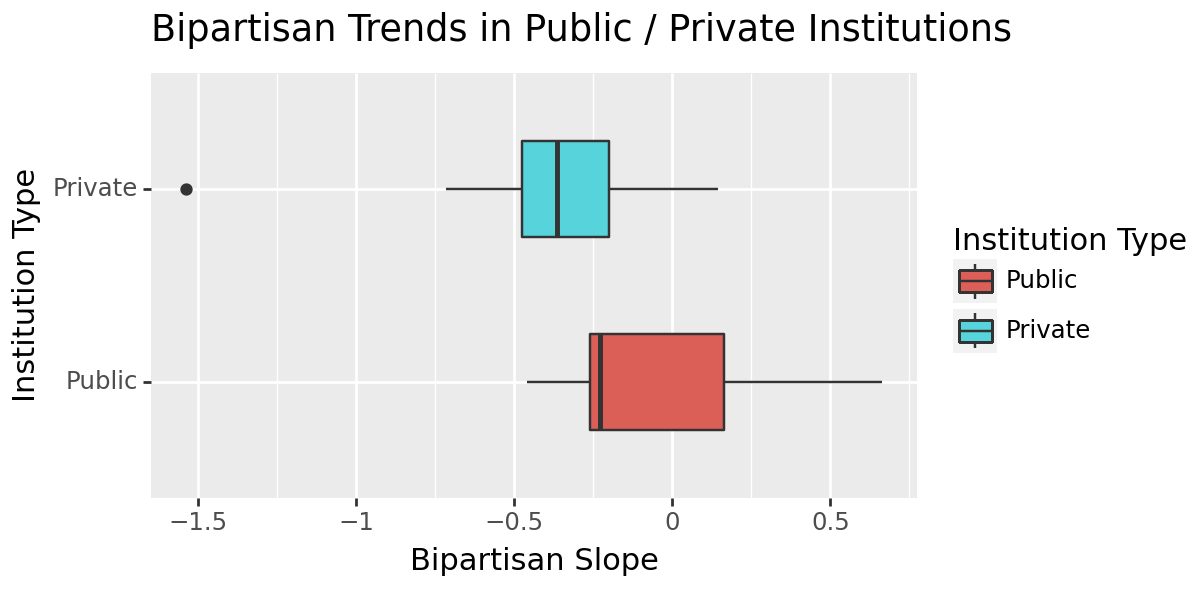

<Figure Size: (600 x 300)>

In [11]:
plot

In [12]:
plot.save(filename = 'pub_pri.png', dpi=1200)

d:\ASDRP\diversity-colleges\env\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 6 x 3 in image.
d:\ASDRP\diversity-colleges\env\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: pub_pri.png


In [13]:
college_data.head()

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type of College,...,2018,2019,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept,Ownership,County,State
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,college-type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ownership,County,State
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,-6.244466,-5.684776,-7.151565,-6.981125,-5.677183,-1.537808,2008.18996,Independent,Santa Clara,California
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Alameda,California
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Catholic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Santa Clara,California
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Los Angeles,California


In [14]:
geo = []
slope = []

for _, row in college_data.iterrows():
    if not pd.isna(row['Bipartisan Slope']):
        geo.append(row['Geographic location'])
        slope.append(row['Bipartisan Slope'])
        
print(geo)
print(slope)

['Suburban', 'Urban', 'Suburban', 'Suburban', 'Urban', 'Suburban', 'Suburban', 'Suburban', 'Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Rural', 'Urban', 'Urban', 'Suburban', 'Urban', 'Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Rural', 'Rural', 'Rural', 'Urban', 'Urban']
[-1.537808106, -0.2257762422, -0.570279725, -0.3868863195, -0.289261152, -0.4433516484, -0.5545454545, -0.266043956, 0.1124224544, -0.4319499284, -0.2975834064, 0.003752946402, -0.4857387104, 0.289383408, 0.1628396987, -0.1194370756, -0.4584491801, -0.2275281465, -0.3436421704, 0.1435299767, -0.241352111, -0.3899215764, -0.7150474216, -0.08839584011, 0.0854016465, -0.4733300771, -0.3653387655, -0.2610306175, 0.6635422148]


In [15]:
df = pd.DataFrame({
    'Geography': geo,
    'bs': slope
})

df['Geography'] = pd.Categorical(df['Geography'], categories=['Urban', 'Suburban', 'Rural'])

df

,Geography,bs
0,Suburban,-1.537808
1,Urban,-0.225776
2,Suburban,-0.570280
3,Suburban,-0.386886
4,Urban,-0.289261
5,Suburban,-0.443352
6,Suburban,-0.554545
7,Suburban,-0.266044
8,Urban,0.112422
9,Urban,-0.431950


# ANOVA

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('bs ~ C(Geography)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Geography),0.871688,2.0,3.456625,0.046648
Residual,3.278327,26.0,NaN,NaN


In [17]:
anova_table.to_clipboard()

In [18]:
plot = (ggplot(df) +
  geom_boxplot(aes(y = 'bs', x = 'factor(Geography)', fill = 'Geography'), width=0.5) +
  coord_flip() +
  xlab("Location") +
  labs(fill="Geographic Location") +
  ggtitle("Bipartisan Trends in Different Geographic Locations") +
  theme(figure_size=(6, 3))
)

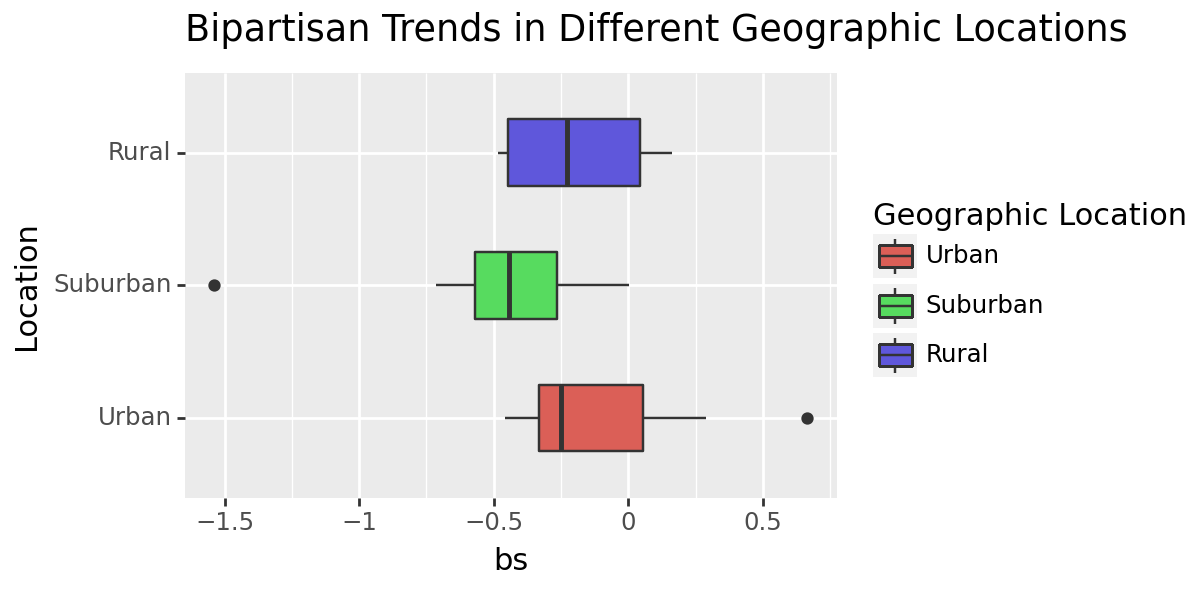

<Figure Size: (600 x 300)>

In [19]:
plot

In [20]:
plot.save(filename = 'geo.png', dpi=1200)

d:\ASDRP\diversity-colleges\env\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 6 x 3 in image.
d:\ASDRP\diversity-colleges\env\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: geo.png


In [21]:
usloc = []
slope = []

for _, row in college_data.iterrows():
    if not pd.isna(row['Bipartisan Slope']):
        usloc.append(row[0])
        slope.append(row['Bipartisan Slope'])
        
print(usloc)
print(slope)

['us-west', 'us-west', 'us-west', 'us-west', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest']
[-1.537808106, -0.2257762422, -0.570279725, -0.3868863195, -0.289261152, -0.4433516484, -0.5545454545, -0.266043956, 0.1124224544, -0.4319499284, -0.2975834064, 0.003752946402, -0.4857387104, 0.289383408, 0.1628396987, -0.1194370756, -0.4584491801, -0.2275281465, -0.3436421704, 0.1435299767, -0.241352111, -0.3899215764, -0.7150474216, -0.08839584011, 0.0854016465, -0.4733300771, -0.3653387655, -0.2610306175, 0.6635422148]


In [22]:
df = pd.DataFrame({
    'Geography': usloc,
    'bs': slope
})

df['Geography'] = pd.Categorical(df['Geography'], categories=['us-west', 'us-south', 'us-northeast', 'us-midwest'])

df

,Geography,bs
0,us-west,-1.537808
1,us-west,-0.225776
2,us-west,-0.570280
3,us-west,-0.386886
4,us-northeast,-0.289261
5,us-northeast,-0.443352
6,us-northeast,-0.554545
7,us-northeast,-0.266044
8,us-northeast,0.112422
9,us-northeast,-0.431950


In [23]:
plot = (ggplot(df) +
  geom_boxplot(aes(y = 'bs', x = 'factor(Geography)', fill = 'Geography'), width=0.5) +
  coord_flip() +
  ylab("Bipartisan Slope") +
  xlab("US Regions") +
  labs(fill="US Region") +
  ggtitle("Bipartisan Trends in Different US Regions") +
  theme(figure_size=(6, 3))
)

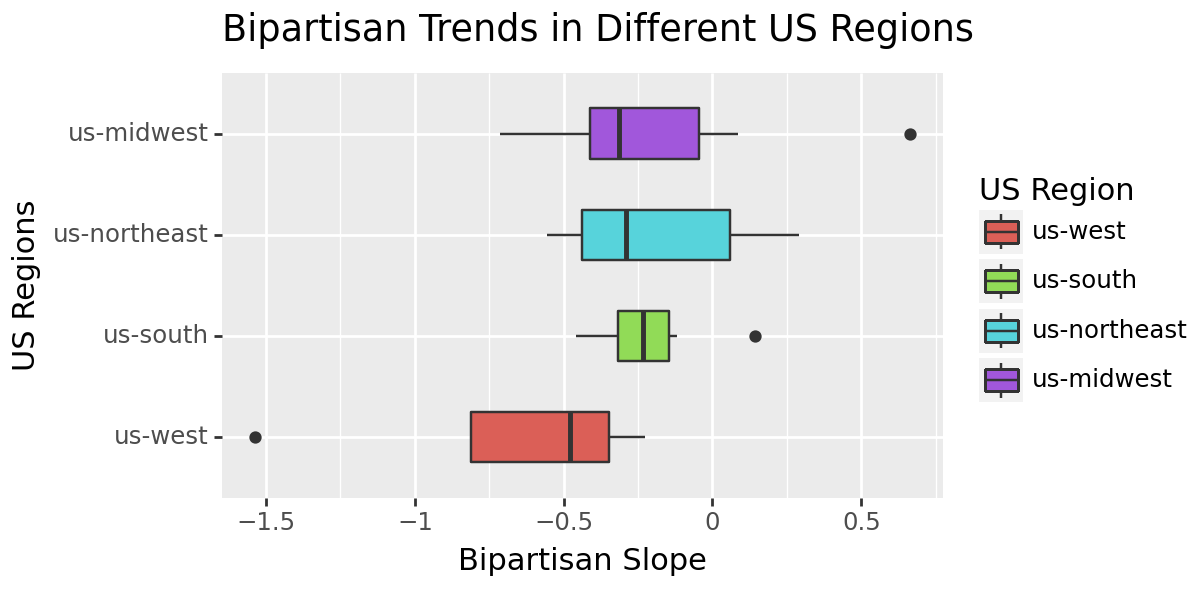

<Figure Size: (600 x 300)>

In [24]:
plot

In [25]:
plot.save(filename = 'regions.png', dpi=1200)

d:\ASDRP\diversity-colleges\env\Lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 6 x 3 in image.
d:\ASDRP\diversity-colleges\env\Lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: regions.png


# Anova Analysis on Difference in Mean Slope of Bipartisan Trend Across US Regions

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('bs ~ C(Geography)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Geography),0.797040,3.0,1.980927,0.142603
Residual,3.352975,25.0,NaN,NaN


In [27]:
anova_table.to_clipboard()

In [28]:
ind = []
slope = []

for _, row in college_data.iterrows():
    if not pd.isna(row['Ownership']):
        ind.append(row[0])
        slope.append(row['Ownership'])
        
print(ind)
print(slope)

['region', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-west', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-northeast', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-south', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest', 'us-midwest']
['ownership', 'Independent', 'Independent', 'Independent', 'Independent', 'Independent', 'Independent', 'Independent', 'Independent ', 'Independent ', 'Dependent ', 'Independent ', 'Independent ', 'Independent', 'Independent', 'Dependent', 'independent', 'independent', 'independent', 'Independent', 'independent', 'Independent', 'Independent', 'Independent', 'Dependent', 'Independent', 'Dependent', 'Indep

# Multivariate Analysis

In [29]:
college_data.head(5)

,,Name,Public / Private,Annual Tuition (2023),Undergraduate Population (2023),Acceptance rate (2021),Ranking (top 100 or not),Geographic location,Male : Female (ratio),Type of College,...,2018,2019,2020,2021,2022,Bipartisan Slope,Bipartisan y-intercept,Ownership,County,State
0,region,name,publicprivate,tuition,population,acceptance,ranking,geo,male2female,college-type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ownership,County,State
1,us-west,Stanford,Private,"$57,692","7,761",4.34%,6,Suburban,49 : 51,Research,...,-6.244466,-5.684776,-7.151565,-6.981125,-5.677183,-1.537808,2008.18996,Independent,Santa Clara,California
2,us-west,UC Berkeley,Public,"$43,980","32,143",17.50%,49,Urban,46 : 54,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Alameda,California
3,us-west,Santa Clara,Private,"$58,017","5,895",52.00%,NaN,Suburban,53 : 47,Catholic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Santa Clara,California
4,us-west,Caltech,Private,"$58,479",901,6.70%,2,Suburban,65 : 35,Research,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Los Angeles,California


In [30]:
df = pd.DataFrame({
    'Pubpriv': pub_pri,
    'Geography': geo,
    'bs': slope
})

df['Geography'] = pd.Categorical(df['Geography'], categories=['Urban', 'Suburban', 'Rural'])
df['Pubpriv'] = pd.Categorical(df['Pubpriv'], categories=['Public', 'Private'])

df

ValueError: All arrays must be of the same length

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('bs ~ C(Pubpriv) + C(Geography) + C(Geography):C(Pubpriv)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Pubpriv),0.221031,1.0,2.564376,0.123558
C(Geography),0.230011,2.0,1.334283,0.283835
C(Geography):C(Pubpriv),0.000137,2.0,0.000794,0.999206
Residual,1.896243,22.0,NaN,NaN
